# Portfolio Optimization

## Monte Carlo Simulation for Optimization Search


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [7]:
tickers = ['amzn','se','spce','avgo','penn','nuan','ttd','de','fdx','roku','pypl','sq','rig','xom']
def portfolio(tickers):
    tickList = []
    for i in tickers:
        temp = yf.download(i,threads=False, start = '2020-10-01', end = '2021-02-22')['Adj Close']
        tickList.append(temp)
    stocks = pd.concat(tickList, axis = 1)
    stocks.columns = tickers
    return stocks
    
stocks = portfolio(tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Simulating Thousands of Possible Allocations

In [8]:
#stock_normed = stocks/stocks.iloc[0]
#stock_normed.plot()


## Single Run for Some Random Allocation

Great! Now we can just run this many times over!

In [9]:
log_ret = np.log(stocks/stocks.shift(1))
num_ports = 100000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.  array(np.random.random(len((stocks.columns))))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
print('Complete')

Complete


In [10]:
print('sharpe Ratio: '+ str(sharpe_arr.max()))
location = sharpe_arr.argmax()
max_sr_ret = ret_arr[location]
max_sr_vol = vol_arr[location]
[print(i[0] +': '+ str(round(i[1]*100,2))  + ' %' )for i in zip(tickers,all_weights[location,:])]

sharpe Ratio: 5.652601757353925
amzn: 1.22 %
se: 6.82 %
spce: 2.16 %
avgo: 6.64 %
penn: 4.48 %
nuan: 8.61 %
ttd: 1.97 %
de: 16.31 %
fdx: 0.66 %
roku: 16.46 %
pypl: 8.1 %
sq: 1.23 %
rig: 12.93 %
xom: 12.43 %


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

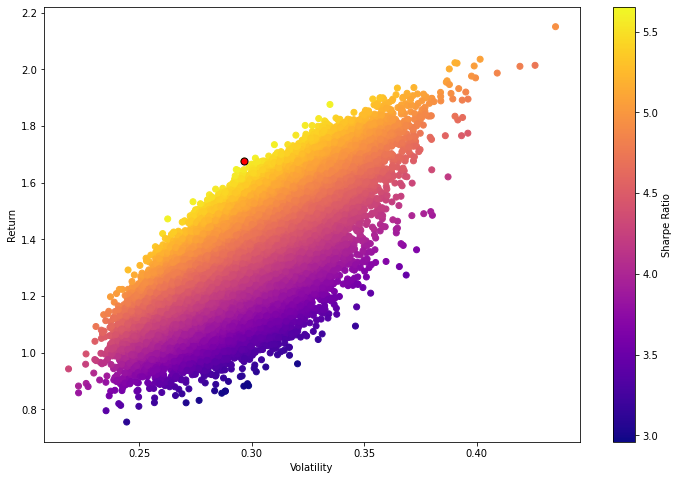

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')